<a href="https://colab.research.google.com/github/Yiting916/ML/blob/main/3_02_LAB_HousePrice_%E4%BD%9C%E6%A5%AD_%E8%A8%93%E7%B7%B4%E9%9A%8E%E6%AE%B5_14_%E9%99%B3%E5%A5%95%E5%A9%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業
使用Gradio建立一個預測房價的程式：套用automobile的程式, 分成訓練和推理兩個python檔

# deadline
**3/30** 之前交

* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 3-02.LAB_HousePrice_作業_學號_姓名  (例: "3-02.LAB_HousePrice_作業_00_陳仁政")
* 附件檔名請設定為： 3-02.LAB_HousePrice_作業_學號_姓名.ipynb (例: "3-02.LAB_HousePrice_作業_00_陳仁政.ipynb")

# 訓練

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
#載入訓練用資料
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/ML/HousePrice_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
2,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
3,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
4,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [74]:
#列出欄位名稱
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [76]:
# 刪除 SalePrice 為空值的資料列
data = data.dropna(subset=['SalePrice'])

In [82]:
# 取出欄位資料值以製作前端介面所需的下拉選單選項
field_names = ['MSSubClass', 'MSZoning', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

field_value = {}
for fname in field_names:
    field_value[fname] = data[fname].value_counts().index
field_value

# 將選項儲存到檔案中
import pickle
with open('/content/drive/MyDrive/ML/field_value.bin', 'wb') as f:
    pickle.dump(field_value, f)

In [77]:
# 套用老師的前處理函式
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
class AutoPreprocess:
    def __init__(self):
        self.scaler = {}
        self.fillna_value = {}
        self.onehotencode_value = {}
        self.field_names = []
        self.final_field_names = []

    def fit(self, data, field_names):
        self.__init__()
        self.field_names = field_names

        for fname in field_names:
            #自動補空值
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位
                # self.fillna_value[fname] = data[fname].mode()[0] #補眾數
                self.fillna_value[fname] = 'np.nan'
                # self.fillna_value[fname] = np.nan # 維持空值
            elif data[fname].dtype == bool: #布林型態
                self.fillna_value[fname] = data[fname].mode()[0] #補眾數
            else: # 數字型態
                self.fillna_value[fname] = data[fname].median()  #補中位數

            #自動尺度轉換(scaling)
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位
                pass #不用轉換
            elif data[fname].dtype == bool: #布林型態
                pass #不用轉換
            else: # 數字型態
                vc = data[fname].value_counts()
                if data[fname].isin([0, 1]).all(): #當數值只有0跟1
                    pass #不用轉換
                elif pd.api.types.is_integer_dtype(data[fname]) and data[fname].nunique() <= 10: #是否簡單的整數型類別且數量小於10
                    self.scaler[fname] = MinMaxScaler()
                    self.scaler[fname].fit(data[[fname]])
                else: #其他的數字型態
                    self.scaler[fname] = StandardScaler()
                    self.scaler[fname].fit(data[[fname]])


            #自動編碼
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位, onehotencode
                field_value = data[fname].value_counts().index
                self.onehotencode_value[fname] = field_value
                for value in field_value:
                    fn = fname+"_"+value
                    # data[fn] = (data[fname] == value).astype('int8')
                    self.final_field_names.append(fn)
            elif data[fname].dtype == bool: #布林型態 轉成0跟1
                # data[fname] = data[fname].astype(int)
                self.final_field_names.append(fname)
            else: # 數字型態 不用重新編碼
                self.final_field_names.append(fname)

        return

    def transform(self, data):
        #如果輸入的data是dict，要先轉成dataframe
        if isinstance(data, dict):
            for fname in self.field_names:
                if fname in data:
                    data[fname] = [data[fname]]
                else:
                    data[fname] = [np.nan]
            data = pd.DataFrame(data)
        else: #將資料複製一份，不修改原本的資料
            data = data.copy()

        for fname in self.field_names:
            #自動補空值
            if data[fname].isnull().any(): #有空值
                # if fname in self.fillna_value:
                    data[fname] = data[fname].fillna(self.fillna_value[fname])


            #自動尺度轉換(scaling)
            if fname in self.scaler:
                data[fname] = self.scaler[fname].transform(data[[fname]])

            #自動編碼
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位, onehotencode
                if fname in self.onehotencode_value:
                    field_value = self.onehotencode_value[fname]
                for value in field_value:
                    fn = fname+"_"+value
                    data[fn] = (data[fname] == value).astype('int8')
            elif data[fname].dtype == bool: #布林型態 轉成0跟1
                data[fname] = data[fname].astype(int)
            else: # 數字型態 不用重新編碼
                pass
        return data[self.final_field_names]

    def save(self, file_name):
        with open(file_name, "wb") as f:
            pickle.dump(self, f)

    @staticmethod
    def load(file_name):
        with open(file_name, "rb") as f:
            return pickle.load(f)

In [78]:
ap = AutoPreprocess()
ap.fit(data, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'])
ap.save('/content/drive/MyDrive/ML/preprocess.bin')

X = ap.transform(data)
y = data['SalePrice']

<ipython-input-77-114f5127d9ff>:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[fn] = (data[fname] == value).astype('int8')
<ipython-input-77-114f5127d9ff>:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[fn] = (data[fname] == value).astype('int8')
<ipython-input-77-114f5127d9ff>:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

In [79]:
from sklearn.model_selection import train_test_split
# 分割資料成訓練組跟驗證組
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

# 訓練模型: 方法1

model_1 訓練組 R2: 0.9759566781641565
model_1 驗證組 R2: 0.8761322905678536


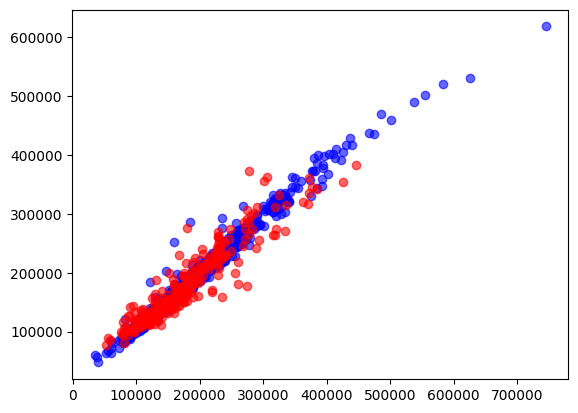

In [80]:
# 訓練模型1 ---> 最終選擇的模型！
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

model_1 = RandomForestRegressor()
model_1.fit(X_train, y_train)

# 驗證模型1
y_pred = model_1.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("model_1 訓練組 R2:", r2)
plt.scatter(y_train, y_pred, alpha=0.6, color='b')
# plt.show()

y_pred = model_1.predict(X_valid)
r2 = r2_score(y_valid, y_pred)
print("model_1 驗證組 R2:", r2)
plt.scatter(y_valid, y_pred, alpha=0.6, color='r')
plt.show()

model_2 訓練組 R2: -4.481498232568345
model_2 驗證組 R2: -5.990882354428212


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


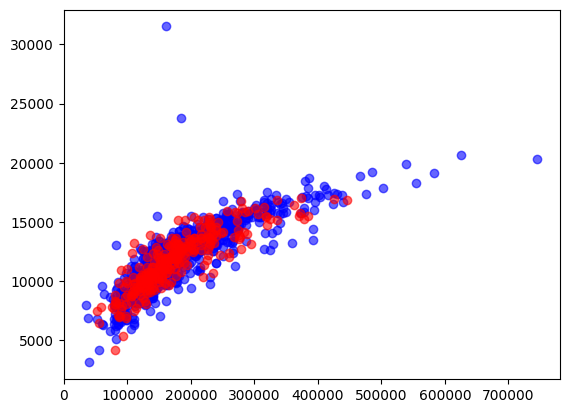

In [21]:
# # 訓練模型2
# from sklearn.neural_network import MLPRegressor
# import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score

# model_2 = MLPRegressor(hidden_layer_sizes=(200,), max_iter=200, random_state=42)
# model_2.fit(X_train, y_train)

# # 驗證模型2
# y_pred = model_2.predict(X_train)
# r2 = r2_score(y_train, y_pred)
# print("model_2 訓練組 R2:", r2)
# plt.scatter(y_train, y_pred, alpha=0.6, color='b')
# # plt.show()

# y_pred = model_2.predict(X_valid)
# r2 = r2_score(y_valid, y_pred)
# print("model_2 驗證組 R2:", r2)
# plt.scatter(y_valid, y_pred, alpha=0.6, color='r')
# plt.show()

model_3 訓練組 R2: 1.0
model_3 驗證組 R2: 0.6749685668978204


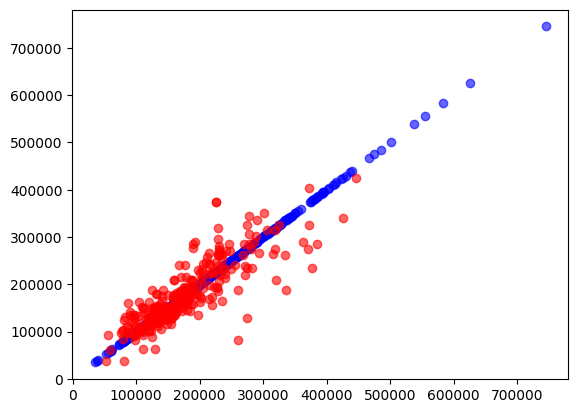

In [22]:
# # 訓練模型3
# from sklearn.tree import DecisionTreeRegressor
# import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score

# model_3 = DecisionTreeRegressor()
# model_3.fit(X_train, y_train)

# # 驗證模型3
# y_pred = model_3.predict(X_train)
# r2 = r2_score(y_train, y_pred)
# print("model_3 訓練組 R2:", r2)
# plt.scatter(y_train, y_pred, alpha=0.6, color='b')
# # plt.show()

# y_pred = model_3.predict(X_valid)
# r2 = r2_score(y_valid, y_pred)
# print("model_3 驗證組 R2:", r2)
# plt.scatter(y_valid, y_pred, alpha=0.6, color='r')
# plt.show()

In [81]:
#儲存模型
import pickle

with open("/content/drive/MyDrive/ML/model_1.bin", "wb") as f:
    pickle.dump(model_1, f)

# 訓練模型：方法2 (RandomizedSearchCV)

In [32]:
# # 訓練模型 SVR
# from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
# from sklearn.svm import SVR

# param_grid = [
#     {"kernel": ["linear"],"C":[0.1,1,10,100,100]},
#     {"kernel": ["poly"], "degree": [2, 3],"C":[0.1,1,10,100,1000],"gamma":["scale", "auto"]},
#     {"kernel": ["rbf"],"C":[0.1,1,10,100,100],"gamma":["scale", "auto"]},
# ]

# svr = SVR()

# search = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, scoring="r2")
# search.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions=[{'C': [0.1, 1, 10, 100, 100],
                                         'kernel': ['linear']},
                                        {'C': [0.1, 1, 10, 100, 1000],
                                         'degree': [2, 3],
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['poly']},
                                        {'C': [0.1, 1, 10, 100, 100],
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['rbf']}],
                   scoring='r2')

In [33]:
# search.best_params_

{'kernel': 'poly', 'gamma': 'scale', 'degree': 2, 'C': 1000}

In [34]:
# search.cv_results_

{'mean_fit_time': array([0.19904857, 0.13035488, 0.08919988, 0.09690766, 0.09368262,
        0.09007635, 0.09351978, 0.0968586 , 0.08752589, 0.0968606 ]),
 'std_fit_time': array([0.08216906, 0.01536881, 0.00430299, 0.0027195 , 0.00774339,
        0.00165622, 0.00462876, 0.00265068, 0.00193194, 0.00081765]),
 'mean_score_time': array([0.03623295, 0.03382711, 0.02346401, 0.05197673, 0.02435007,
        0.02382321, 0.02422152, 0.05352917, 0.02409716, 0.05316739]),
 'std_score_time': array([0.00238104, 0.00539917, 0.0009403 , 0.00245897, 0.00141002,
        0.00053278, 0.0008427 , 0.0048458 , 0.00084579, 0.00517781]),
 'param_kernel': masked_array(data=['poly', 'poly', 'poly', 'rbf', 'poly', 'poly', 'poly',
                    'rbf', 'poly', 'rbf'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_gamma': masked_array(data=['auto', 'scale', 'auto', 'scale', 'sc

In [36]:
# search.best_estimator_

SVR(C=1000, degree=2, kernel='poly')

訓練組 R2: 0.6033441467882594
驗證組 R2: 0.6329576997813298


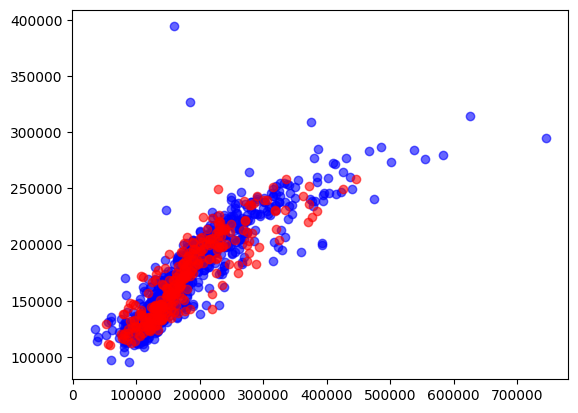

In [37]:
# # 驗證模型
# import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score

# model = search.best_estimator_
# y_pred = model.predict(X_train)
# r2 = r2_score(y_train, y_pred)
# print("訓練組 R2:", r2)
# plt.scatter(y_train, y_pred, alpha=0.6, color='b')
# # plt.show()

# y_pred = model.predict(X_valid)
# r2 = r2_score(y_valid, y_pred)
# print("驗證組 R2:", r2)
# plt.scatter(y_valid, y_pred, alpha=0.6, color='r')
# plt.show()